그룹별 차이를 나타내기 위한 비교 시각화는 데이터가 간단하면

막대그래프 만으로도 충분히 표현할 수 있지만

그룹별 요소가 많아지게 되면 효율적인 기법을 사용해야 한다


히트맵 차트는 그룹과 비교 요소가 많을 때 효과적으로 시각화를 할 수 있는 방법이다

다른 시각화 방법에 비해 그리는 것이 까다롭기 때문에, 현재 가지고 있는 데이터의 구조와 자신이 확인하고자

하는 목적을 정확히 파악한 다음 차트를 그려야 한다

분류 그룹이나 변수가 너무 많으면 혼란을 유발할 수 있기 때문에 적정한 수준으로 데이터를 정제하는 작업이


필요하다.

이러한 점들만 유의해서 그리면 많은 정보를 한번에 표시할 수 있는 유용한 시각화 방법이다


히트맵 차트 실습


1. 패키지 임포트

In [62]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import datetime
import seaborn as sns
import numpy as np
from math import pi
from pandas.plotting import parallel_coordinates

2. 데이터 불러오기 및 확인

In [63]:
df = pd.read_csv('/content/nba2021_advanced.csv')

df.head()

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Precious Achiuwa,PF,21,MIA,28,408,15.1,0.599,0.000,0.541,10.5,19.8,15.4,6.8,1.4,3.8,16.1,19.7,0.3,0.6,0.9,0.101,-2.8,-0.2,-3.0,-0.1
1,Jaylen Adams,PG,24,MIL,6,17,-6.9,0.125,0.250,0.000,0.0,18.2,9.4,13.4,0.0,0.0,0.0,19.7,-0.1,0.0,-0.1,-0.265,-15.6,-5.2,-20.9,-0.1
2,Steven Adams,C,27,NOP,27,760,15.9,0.592,0.006,0.397,16.9,18.0,17.5,10.1,1.7,2.0,20.1,12.8,1.2,0.5,1.7,0.109,-0.1,-1.0,-1.1,0.2
3,Bam Adebayo,C,23,MIA,26,873,22.7,0.641,0.015,0.469,6.8,23.2,15.4,27.9,1.4,3.2,16.2,24.6,2.3,1.3,3.6,0.196,2.9,2.0,4.9,1.5
4,LaMarcus Aldridge,C,35,SAS,18,480,15.2,0.542,0.298,0.093,3.2,14.0,8.4,11.4,0.7,2.8,6.4,22.3,0.2,0.5,0.7,0.075,0.3,-1.0,-0.7,0.2


3. 히트맵 시각화를 위한 데이터 전처리

In [64]:
df1 = df[df['Tm'].isin(['ATL','BOS','BRK','CHI','CHO'])]    # df안의 5개 팀만 필터링

df1 = df1[['Tm','ORB%', 'TRB%', 'AST%', 'BLK%', 'USG%']]    # 6개 칼럼만 필터링

df1 = df1.groupby('Tm').mean()  # 팀별 요소 평균 전처리

df1.head()

,ORB%,TRB%,AST%,BLK%,USG%
Tm,,,,,
ATL,5.250000,10.400000,13.893750,1.718750,18.412500
BOS,5.681250,10.362500,12.881250,2.437500,18.325000
BRK,4.394737,10.547368,15.210526,2.147368,18.868421
CHI,4.482353,10.976471,13.500000,1.405882,17.582353
CHO,7.628571,11.742857,14.900000,2.764286,19.357143


4. 팀별 5개 요소 히트맵 시각화

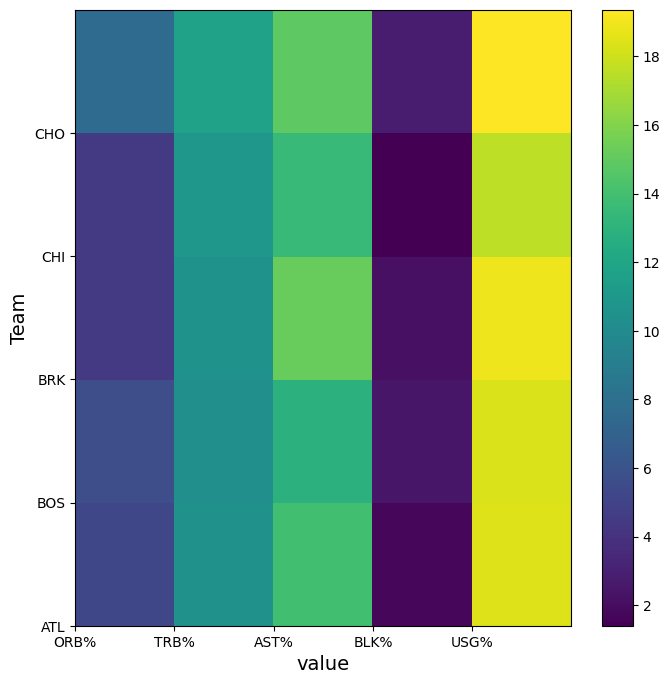

In [65]:
fig = plt.figure(figsize = (8,8))
fig.set_facecolor('white')

plt.pcolor(df1.values)

# x축 칼럼 설정
plt.xticks(range(len(df1.columns)), df1.columns)

# y축 칼럼 설정
plt.yticks(range(len(df1.index)), df1.index)

# x축 레이블 설정
plt.xlabel('value', fontsize = 14)

# y축 레이블 설정
plt.ylabel('Team', fontsize = 14)

plt.colorbar()
plt.show()

5. 하나의 변숫값에 대한 히트맵 시각화를 위한 데이터 전처리

In [66]:
df2 = df[df['Tm'].isin(['ATL','BOS','BRK','CHI','CHO'])]   # 5개 팀만 전처리

df2 = df2[['Tm', 'Age', 'G']]   # 팀명, 연령, 참여 게임 수 칼럼만 필터링

df2 = df2.groupby(['Tm', 'Age']).mean().reset_index() # 팀, 연령 기준 평균으로 전처리

df2 = df2.pivot(index= 'Tm', columns= 'Age', values= 'G')

df2.head()

Age,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34
Tm,,,,,,,,,,,,,,,
ATL,NaN,9.0,24.0,23.000000,16.250000,NaN,22.000000,25.0,NaN,9.0,21.5,NaN,NaN,16.0,14.0
BOS,NaN,NaN,13.0,20.000000,17.333333,26.0,6.000000,22.0,18.0,26.0,26.0,13.0,NaN,23.0,NaN
BRK,NaN,14.0,NaN,8.500000,26.000000,26.0,15.000000,12.0,3.0,16.5,30.0,NaN,16.0,23.5,30.0
CHI,26.0,27.0,8.5,15.000000,14.000000,7.0,16.500000,11.0,19.5,6.0,16.0,NaN,NaN,23.0,26.0
CHO,15.5,NaN,NaN,22.333333,9.000000,NaN,21.666667,26.0,NaN,20.5,NaN,26.0,NaN,NaN,NaN


6. 하나의 변숫값에 대한 히트맵 시각화

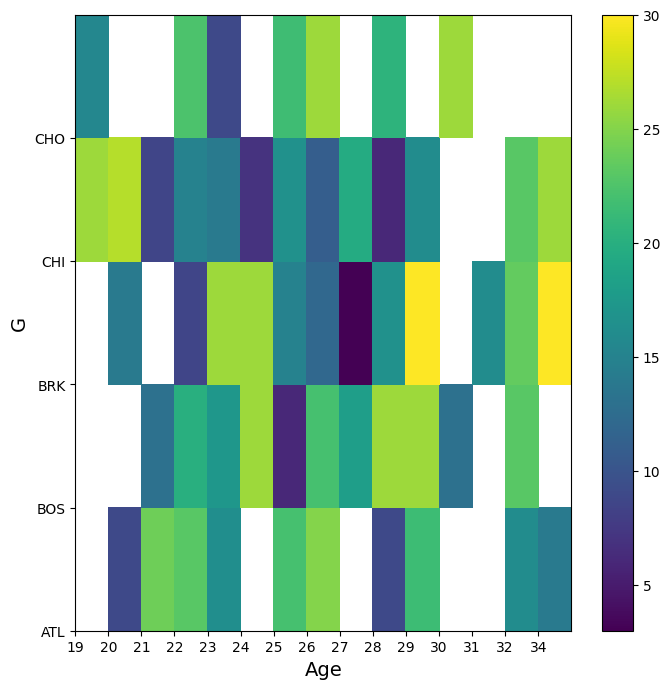

In [67]:
fig = plt.figure(figsize = (8,8))
fig.set_facecolor('white')

plt.pcolor(df2.values)

# x축 칼럼 설정
plt.xticks(range(len(df2.columns)), df2.columns)

# y축 칼럼 설정
plt.yticks(range(len(df2.index)), df2.index)

# x축 레이블 설정
plt.xlabel('Age', fontsize = 14)

# y축 레이블 설정
plt.ylabel('G', fontsize = 14)

plt.colorbar()
plt.show()

흰색공간은 없다는 것을 뜻한다

방사형차트

1. 방사형 차트 시각화를 위한 데이터 전처리

In [68]:
df3 = df[df['Tm'].isin(['ATL','BOS','BRK','CHI','CHO'])]    # df안의 5개 팀만 필터링

df3 = df3[['Tm','ORB%', 'TRB%', 'AST%', 'BLK%', 'USG%']]    # 6개 칼럼만 필터링

df3 = df3.groupby('Tm').mean().reset_index()  # 팀별 요소 평균 전처리

df3.head()

,Tm,ORB%,TRB%,AST%,BLK%,USG%
0,ATL,5.250000,10.400000,13.893750,1.718750,18.412500
1,BOS,5.681250,10.362500,12.881250,2.437500,18.325000
2,BRK,4.394737,10.547368,15.210526,2.147368,18.868421
3,CHI,4.482353,10.976471,13.500000,1.405882,17.582353
4,CHO,7.628571,11.742857,14.900000,2.764286,19.357143


방사형 차트를 시각화하기 위해서는 인덱스를 초기화해주어야 한다.

2. 방사형 차트 시각화 (하나의 차트에 하나의 그룹씩)

<ipython-input-69-754f43804730>:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  my_palette = plt.cm.get_cmap("Set2", len(df3.index))


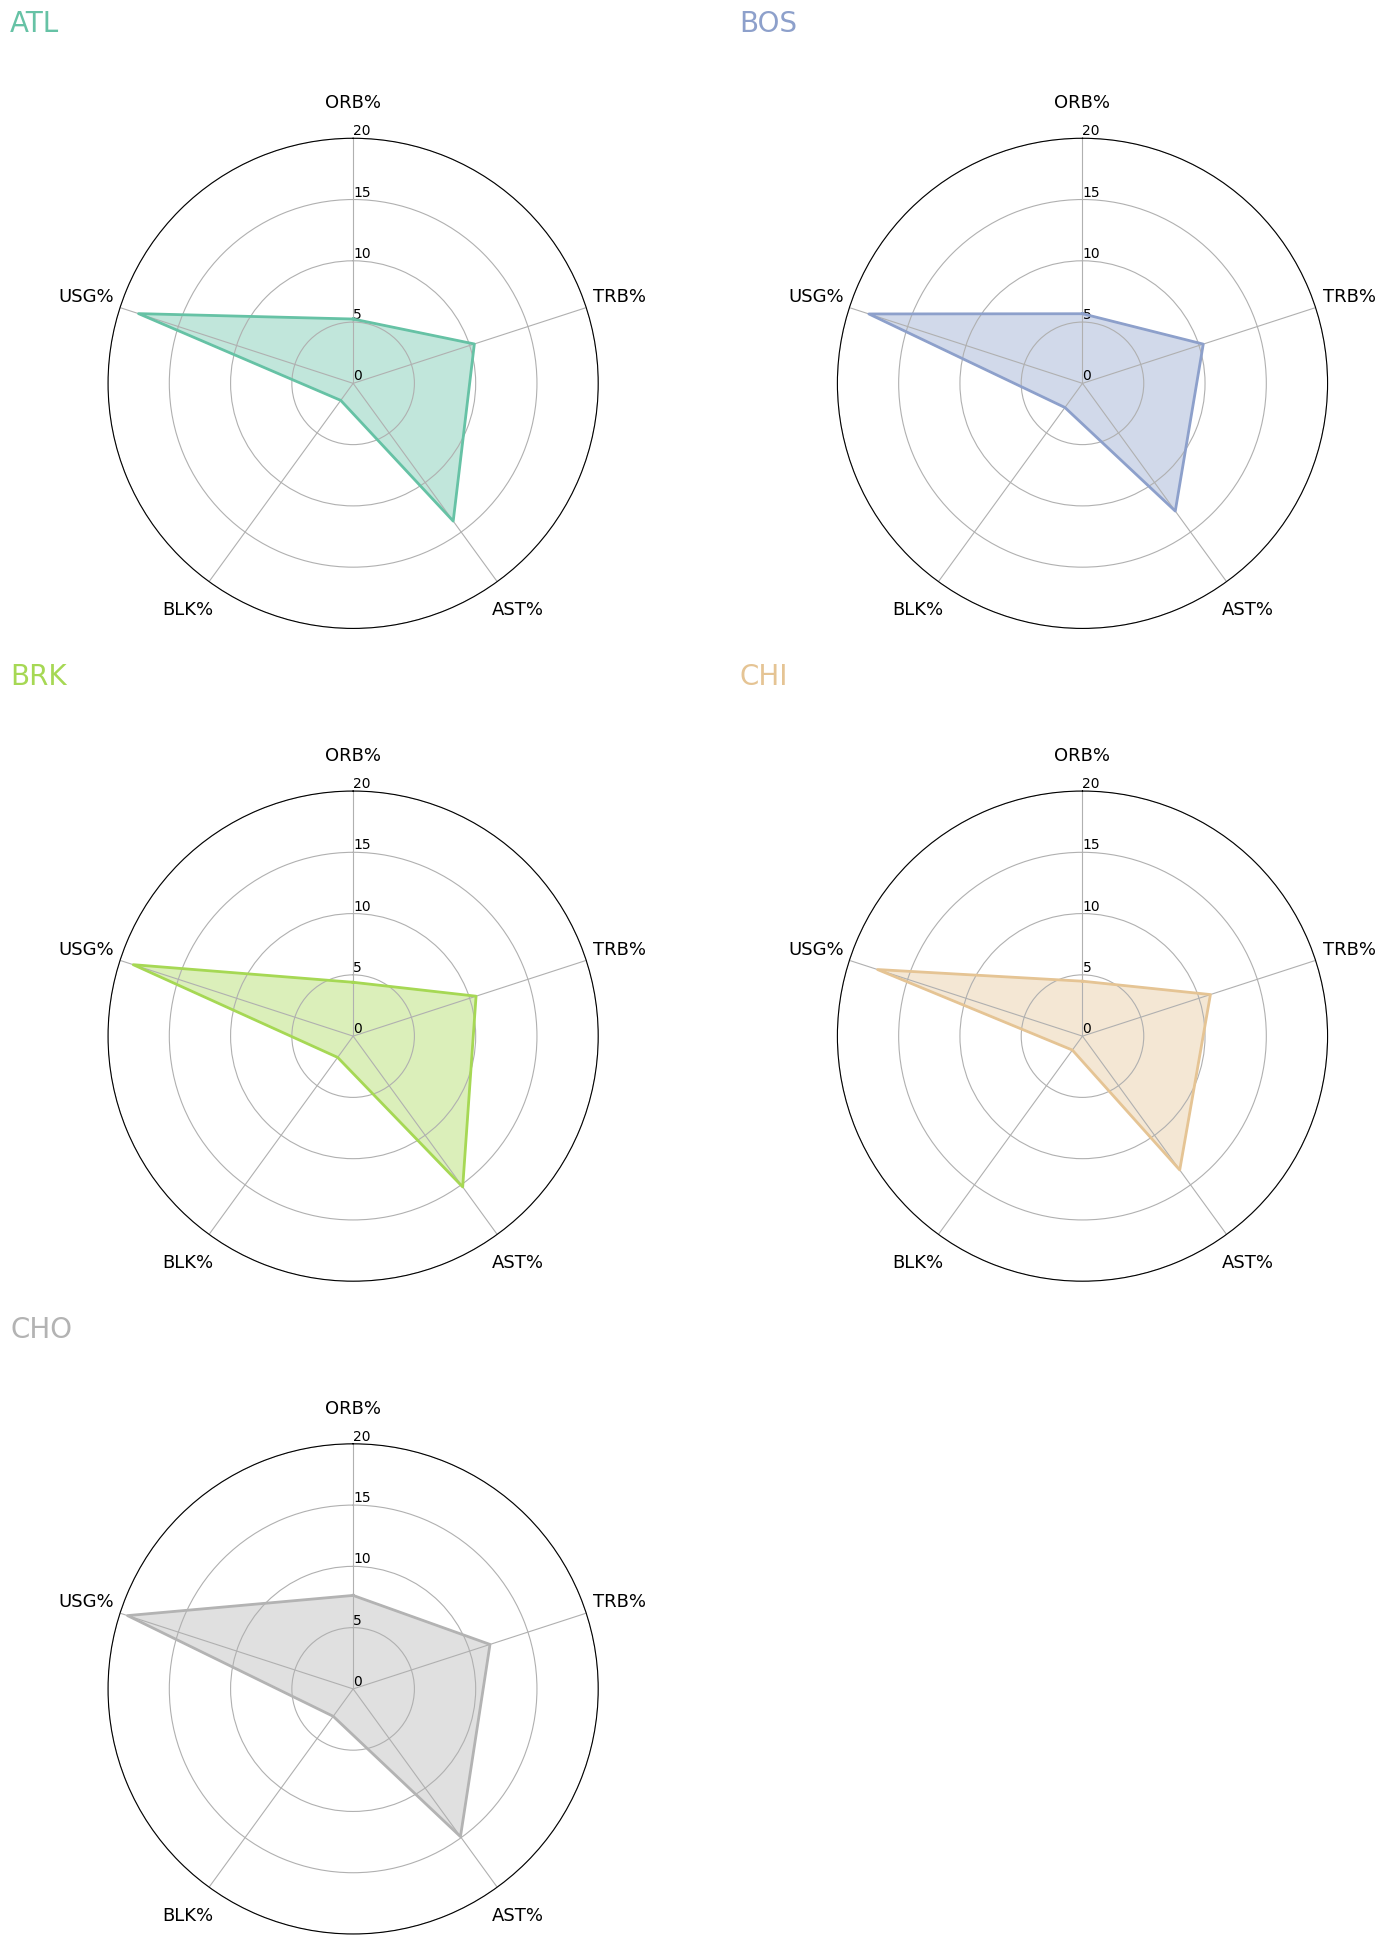

In [69]:
labels = df3.columns[1:]
num_labels = len(labels)

# 등분점 생성
angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)]

# 시작점 생성
angles += angles[:1]

my_palette = plt.cm.get_cmap("Set2", len(df3.index))

fig = plt.figure(figsize = (15,20))
fig.set_facecolor('white')

for i, row in df3.iterrows():
    color = my_palette(i)
    data = df3.iloc[i].drop('Tm').tolist()
    data += data[:1]

    ax = plt.subplot(3,2,i+1, polar=True)

    # 시작점 설정
    ax.set_theta_offset(pi/2)

    # 시계방향 설정
    ax.set_theta_direction(-1)

    # 각도 축 눈금 생성
    plt.xticks(angles[:-1], labels, fontsize = 13)

    # 각 축과 눈금 사이 여백 생성
    ax.tick_params(axis='x', which ='major', pad = 15)

    # 반지름 축 눈금 라벨 각도 0으로 설정
    ax.set_rlabel_position(0)

    # 반지름 축 눈금 성정
    plt.yticks([0,5,10,15,20], ['0', '5', '10', '15', '20'], fontsize = 10)
    plt.ylim(0,20)

    # 방사형 차트 출력
    ax.plot(angles, data, color=color, linewidth = 2, linestyle = 'solid')

    # 도형 안쪽 색상 설정
    ax.fill(angles, data, color=color, alpha = 0.4)

    # 각 차트의 제목 설정
    plt.title(row.Tm, size = 20, color = color,  x=-0.2, y=1.2, ha ='left')

# 차트 간 간격 설정
plt.tight_layout(pad=3)
plt.show()

3. 방사형 차트 시각화 - 하나의 차트에 모든 그룹

<ipython-input-70-ded536111edb>:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  my_palette = plt.cm.get_cmap("Set2", len(df3.index))


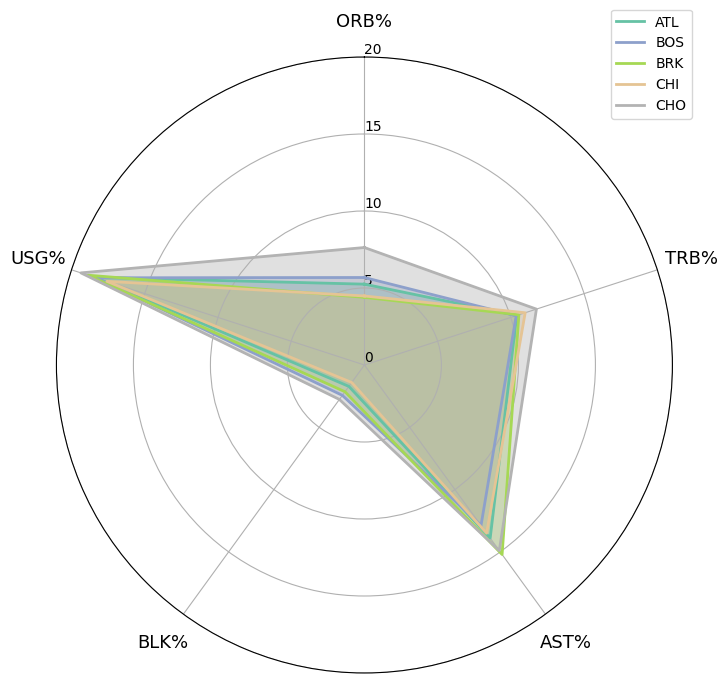

In [70]:
labels = df3.columns[1:]
num_labels = len(labels)

# 등분점 생성
angles = [x/float(num_labels) * (2*pi) for x in range(num_labels)]

# 시작점 생성
angles += angles[:1]

# matplotlib의 색상 맵(color map)에서 "Set2"라는 색상 맵을 가져와서, df3 데이터프레임의 행 인덱스 수만큼의 색상을 가지는 새로운 색상 팔레트를 생성
my_palette = plt.cm.get_cmap("Set2", len(df3.index))

fig = plt.figure(figsize = (8,8))
fig.set_facecolor('white')
ax = fig.add_subplot(polar=True)

for i, row in df3.iterrows():   # df3 데이터프레임의 모든 행을 순회
    color = my_palette(i)   # my_palette 색상 팔레트를 사용하여 현재 행(i)에 대한 색상을 지정
    data = df3.iloc[i].drop('Tm').tolist()  #  'Tm' 열을 제외한 나머지 데이터를 추출
    data += data[:1]    # 레이더 차트나 폐곡선 차트를 그릴 때 시작점과 끝점이 같게 만들어 폐곡선을 형성하기 위해 사용

    # 시작점
    ax.set_theta_offset(pi / 2)

    # 시계방향 설정
    ax.set_theta_direction(-1)

    # 각도 축 눈금 생성
    plt.xticks(angles[:-1], labels, fontsize=13)

    # 각 축과 눈금 사이 여백 생성
    ax.tick_params(axis='x', which = 'major', pad = 15)

    # 반지름 축 눈금 라벨 각도 0으로 설정
    ax.set_rlabel_position(0)

    # 반지름 축 눈금 설정
    plt.yticks([0,5,10,15,20], ['0', '5', '10', '15', '20'], fontsize = 10)
    plt.ylim(0,20)

    # 방사형 차트 출력
    ax.plot(angles, data, color = color, linewidth = 2, linestyle = 'solid', label = row.Tm)

    #도형 안쪽 색상 설정
    ax.fill(angles, data, color=color, alpha = 0.4)

plt.legend(loc = (0.9, 0.9))
plt.show()

평행 좌표 그래프 시각화


In [ ]:
df3 = df[df['Tm'].isin(['ATL','BOS','BRK','CHI','CHO'])]    # df안의 5개 팀만 필터링

df3 = df3[['Tm','ORB%', 'TRB%', 'AST%', 'BLK%', 'USG%']]    # 6개 칼럼만 필터링

df3 = df3.groupby('Tm').mean().reset_index()  # 팀별 요소 평균 전처리

df3.head()

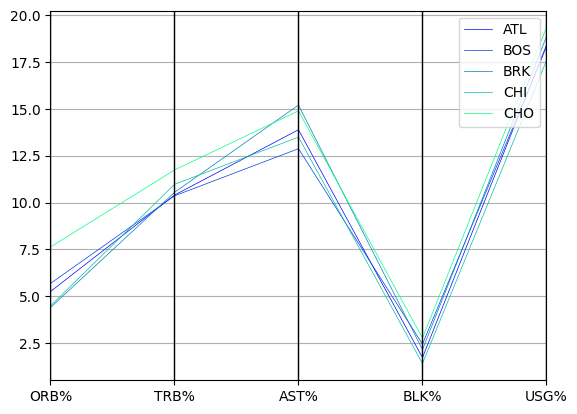

<Figure size 1600x800 with 0 Axes>

In [78]:
fig, axes = plt.subplots()

plt.figure(figsize = (16, 8))

parallel_coordinates(df3, 'Tm', ax=axes, colormap= 'winter', linewidth = '0.5')

plt.show()